In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Define paths to dataset
data_dir = '/content/drive/MyDrive/Face Mask Detection Dataset/Face Mask Dataset'
train_dir = os.path.join(data_dir, 'Train')
val_dir = os.path.join(data_dir, 'Validation')
test_dir = os.path.join(data_dir, 'Test')

In [3]:
# Image parameters
IMG_SIZE = 224  # Image size (224x224)
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
# Load data
def load_data(directory, datagen):
    return datagen.flow_from_directory(
        directory,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

train_data = load_data(train_dir, train_datagen)
val_data = load_data(val_dir, val_datagen)
test_data = load_data(test_dir, test_datagen)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [5]:
# Model Building
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
EPOCHS = 10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    steps_per_epoch=train_data.samples // BATCH_SIZE,
    validation_steps=val_data.samples // BATCH_SIZE
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 1571s 5s/step - accuracy: 0.9558 - loss: 0.1152 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 2/10
  1/312 ━━━━━━━━━━━━━━━━━━━━ 11:30 2s/step - accuracy: 1.0000 - loss: 0.0038

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.9889 - loss: 0.0330 - val_accuracy: 0.9937 - val_loss: 0.0223
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 162us/step - accuracy: 0.9688 - loss: 0.0332
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 679s 2s/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9950 - val_loss: 0.0180
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 123us/step - accuracy: 0.9688 - loss: 0.2628
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9925 - val_loss: 0.0243
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 146us/step - accuracy: 0.9688 - loss: 0.0962
Epoch 9/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9950 - val_loss: 0.0252
Epoch 10/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 127us/step - accuracy: 1.0000 - loss: 0.0067


In [6]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Classification report
predictions = model.predict(test_data)
pred_labels = (predictions > 0.5).astype(int).flatten()
true_labels = test_data.classes
print(classification_report(true_labels, pred_labels, target_names=['WithoutMask', 'WithMask']))

# Save model
model.save('/content/drive/My Drive/FaceMaskModel1.h5')

31/31 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.9886 - loss: 0.0165
Test Accuracy: 98.99%
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


              precision    recall  f1-score   support

 WithoutMask       0.49      0.49      0.49       483
    WithMask       0.52      0.52      0.52       509

    accuracy                           0.51       992
   macro avg       0.51      0.51      0.51       992
weighted avg       0.51      0.51      0.51       992



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: With Mask (Confidence: 0.99)


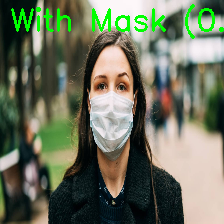

In [21]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Define image size
IMG_SIZE = 224

def test_with_image(image_path):
    """
    Test the pre-trained model on a single image.

    Parameters:
    image_path (str): Path to the image file.
    """
    # Load the pre-trained model
    model = tf.keras.models.load_model('/content/drive/MyDrive/FaceMaskModel.h5')

    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}. Please check the path.")
        return

    # Resize and preprocess the image
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_preprocessed = preprocess_input(img_resized)
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_preprocessed)
    label = "With Mask" if prediction < 0.5 else "Without Mask"
    confidence = prediction[0][0] if prediction > 0.5 else 1 - prediction[0][0]

    # Print prediction and confidence
    print(f"Prediction: {label} (Confidence: {confidence:.2f})")

    # Annotate the image
    color = (0, 255, 0) if label == "With Mask" else (0, 0, 255)
    cv2.putText(img_resized, f"{label} ({confidence:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Display the image in Colab
    cv2_imshow(img_resized)

# Example usage
image_path = '/content/proxy-image (1).jpeg'  # Replace with the actual image path
test_with_image(image_path)


In [26]:
# Install required libraries
!pip install flask flask-ngrok opencv-python-headless

# Download necessary files
!wget -O deploy.prototxt https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -O res10_300x300_ssd_iter_140000.caffemodel https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

# Import necessary libraries
import cv2
from flask import Flask, Response
from pyngrok import ngrok

# Initialize Flask app
app = Flask(__name__)

# Load pre-trained face detector from OpenCV
face_net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# Initialize video capture (using webcam)
video_capture = cv2.VideoCapture(0)

def generate_frames():
    """Function to process frames and detect faces."""
    while True:
        success, frame = video_capture.read()
        if not success:
            break

        # Prepare frame for face detection
        blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
        face_net.setInput(blob)
        detections = face_net.forward()

        # Draw bounding boxes around detected faces
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:  # Confidence threshold
                box = detections[0, 0, i, 3:7] * [frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]]
                (startX, startY, endX, endY) = box.astype("int")
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
                text = f"{int(confidence * 100)}%"
                cv2.putText(frame, text, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Encode frame to send via Flask
        ret, buffer = cv2.imencode(".jpg", frame)
        frame = buffer.tobytes()
        yield (b"--frame\r\n"
               b"Content-Type: image/jpeg\r\n\r\n" + frame + b"\r\n")

@app.route("/video_feed")
def video_feed():
    """Video feed route."""
    return Response(generate_frames(), mimetype="multipart/x-mixed-replace; boundary=frame")

@app.route("/")
def index():
    """Home route."""
    return "Real-time Face Detection is Running. Go to /video_feed to view the stream."

# Start the app with Ngrok
if __name__ == "__main__":
    # Add your Ngrok authtoken here (replace YOUR_AUTH_TOKEN with your token)
    !ngrok config add-authtoken 2nAAMdoe2oC5EdCU025WnLfYvxK_4Aw8KUqCjEJjS8ppQEMVY

    # Start Ngrok and Flask app
    public_url = ngrok.connect(5000)
    print(f"App is live at: {public_url}")
    app.run(port=5000)


--2024-12-14 06:00:07--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

2024-12-14 06:00:07 (17.9 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2024-12-14 06:00:07--  https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_s

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:05:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:05:25] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:05:41] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:06:32] "GET /video_feed HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:07:04] "GET /video_feed HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:09:40] "GET /video_feed HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:09:41] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:09:48] "GET /video_feed HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:10:57] "GET /video_feed HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 06:11:20] "GET / 